In [1]:
import pandas as pd

from supp_func import *
from models import calculate_concentrations

In [2]:
params = {
    'k1_max': 0.19, 
    'EC50_k1': 46.8,
    'h_k1': 1.27,
    'IC50_k1_ilo': 0.048,
    'h_k1_ilo': 1.52,

    'k2_max': 0.032,
    'EC50_k2': 589.8,
    'h_k2': 3.92,
    'IC50_k2_ilo': 0.21,
    'h_k2_ilo': 2.14,

    'k3_max': 0.064,  
    'EC50_k3': 589.8,  
    'h_k3': 3.92,
    'IC50_k3_ilo': 0.21,
    'h_k3_ilo': 2.14,

    'k21_max': 0.03575493711665262, # k4
    'EC50_k21': 14864.185064889107,
    'h_k21': 1,

    'k12_max': 0.031, # k-4
    'EC50_k12': 0.13844649164401096,
    'h_k12': 1.52,

    'k11_max': 0.0014552193274046377, # k-1

    'k5_max': 0.0028,
    'k5_max_a': 0.0028,
    'EC50_k5_ilo': 0.048,
    'h_k5_ilo': 1.52,
    'IC50_k5_ADP': 1840,
    'h_k5_ADP': 1.4,

    'k6_max': 0.055,
    'k6_max_a': 0.016,
    'EC50_k6_ilo': 0.21,
    'h_k6_ilo': 2.14,
    'IC50_k6_ADP': 990,
    'h_k6_ADP': 1.9,

    'k7_max': 0.02400471869642557,
    'k7_max_a': 0.016,
    'EC50_k7_ilo': 0.21,  
    'h_k7_ilo': 2.14,     
    'IC50_k7_ADP': 974.6880784134664,
    'h_k7_ADP': 1.000000087275585
}


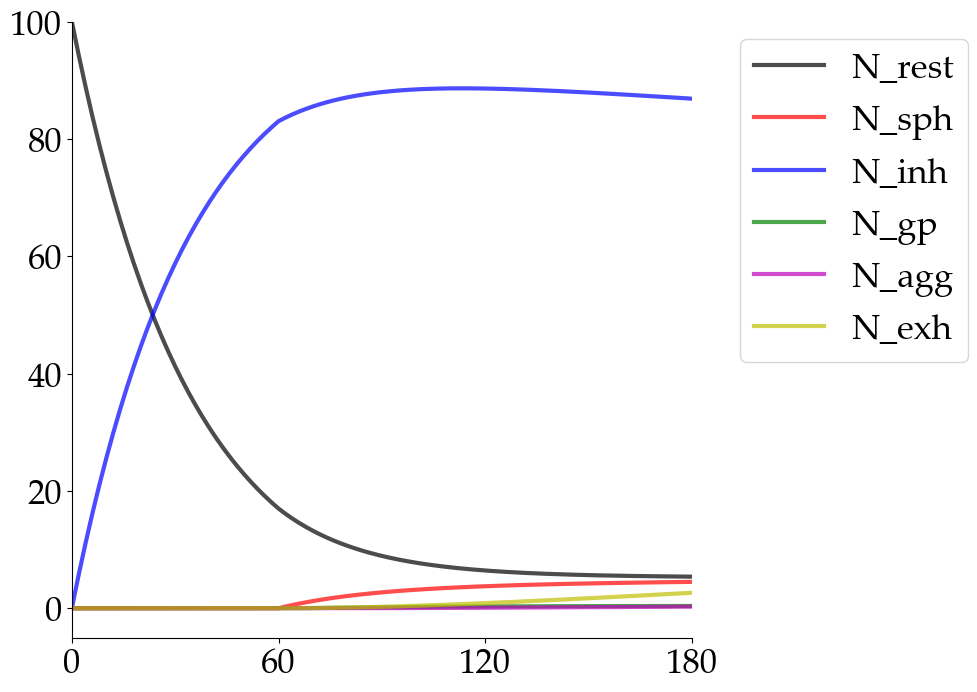

In [3]:
# Initial concentrations of phenotypes in percent
# 'N_rest', 'N_sph', 'N_inh', 'N_gp', 'N_agg', 'N_exh'
y0 = [100.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# x-axis parameters
min_time = 0
max_time = 180
xtick = 60

# Time, ADP concentration, Iloprost concentration
# Example 1 (add 5000 nM ADP): points = [[0, 5000, 0]]
# Example 2 (add 1 nM Ilo and only after 60 seconds add 1000 nM ADP): points = [[0, 0, 1], [60, 1000, 1]]
points = [
    [0, 0, 1],
    [60, 1000, 1]
]

results = calculate_concentrations(points, max_time, y0, params)
results.to_excel('results.xlsx', index=False)
allowed_columns = ['N_rest', 'N_sph', 'N_inh', 'N_gp', 'N_agg', 'N_exh']
plot_selected_columns(results, allowed_columns, max_time, xtick, save_path='results.png', min_time=min_time, legend=True)